# Парсинг

In [ ]:
from requests import get      # Библиотека для отправки запросов
import numpy as np   # Библиотека для матриц, векторов и линала
import pandas as pd  # Библиотека для табличек
import time          # Библиотека для времени
import requests
import time

In [ ]:
!pip install fake-useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
from fake_useragent import UserAgent

In [ ]:
page_link = 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/'

In [ ]:
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

In [ ]:
html = response.content
html

b'<!DOCTYPE html><html lang="ru"><head><link rel="apple-touch-icon" sizes="180x180" href="https://i2.mybook.io/next/favicons/apple-touch-icon.png"/><link rel="icon" type="image/png" sizes="48x48" href="https://i3.mybook.io/next/favicons/favicon-48x48.png"/><link rel="icon" type="image/png" sizes="32x32" href="https://i3.mybook.io/next/favicons/favicon-32x32.png"/><link rel="icon" type="image/png" sizes="16x16" href="https://i2.mybook.io/next/favicons/favicon-16x16.png"/><link rel="manifest" href="https://i1.mybook.io/static/rebook/manifest/yandex.json"/><link rel="preconnect" href="https://fonts.gstatic.com" crossorigin /><meta charSet="utf-8"/><meta name="msapplication-TileColor" content="#fec41f"/><meta name="msapplication-TileImage" content="https://i2.mybook.io/next/favicons/mstile-144x144.png"/><meta name="msapplication-config" content="/next/favicons/browserconfig.xml"/><meta name="theme-color" content="#fec41f"/><meta name="apple-itunes-app" content="app-id=556540446, affiliate-

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(html,'html.parser')
soup

In [ ]:
script = soup.find('script', {'id':'__NEXT_DATA__'})
script

In [ ]:
import json

data = json.loads(script.text)
props = data['props']
initialProps = props['initialProps']
pageProps = initialProps['pageProps']
reviews = pageProps['reviews']
name = reviews[1]['user']['display_name']
comment = reviews[1]['comment_plain']
date = reviews[1]['submit_date']
rating = reviews[1]['book_rating']
share_url = reviews[1]['share_url']
print(f'Комментарий: {comment},\n Дата: {date},\n Оценка: {rating},\n Ссылка: {share_url},\n Имя: {name}')

Комментарий: Введение Бестселлер, популярнейшая книга, сильнейший мотиватор, всё это можно услышать о " НИ СЫ". Джен Синсеро в простой форме объясняет всевозможные методики саморазвития. Ключевой темой книги конечно же является уверенность в собственных силах. Но так ли всё просто. Неужели чтобы в жизни произошел успех надо лишь захотеть стать более уверенным?Мысли о жанре К книгам по саморазвитию у меня особое отношение среди всех жанров литературы. Я этот жанр обхожу стороной, потому что в большинстве случаев такие книги - вода. Дельные мысли есть на пару страниц, но ради этого тратить часы, уж извольте. Конечно это относится не ко всем книгам. Есть полезные книги, которые буквально могут изменить жизнь человека в лучшую сторону. Да и для некоторых людей читать нон-фикшн куда полезнее, чем художку, и я этих людей понимаю.Для меня же намного эффективнее прочитать рецензию на нон-фикшн или посмотреть видео " книга за n минут". Информация подана намного интереснее, часто с примерами. Ср

In [ ]:
len(reviews)

10

In [ ]:
for i in range(len(reviews)):

  name = reviews[i]['user']['display_name']
  comment = reviews[i]['comment_plain']
  date = reviews[i]['submit_date']
  rating = reviews[i]['book_rating']
  share_url = reviews[i]['share_url']
  print(f'Комментарий: {comment},\n Дата: {date},\n Оценка: {rating},\n Ссылка: {share_url},\n Имя: {name}')

In [ ]:
def getPageLinks(page_number):
    page_links = "https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page={}".format(page_number)#составили ссылку на стр поиска
    #запрашиваем данные по странице
    response = get(page_link)
    #получаем содержимое страницы
    html = response.content
    soup = BeautifulSoup(html,"html.parser")
    script = soup.find('script', {'id':'__NEXT_DATA__'})

    for i in range(len(reviews)):
      name = reviews[i]['user']['display_name']
      comment = reviews[i]['comment_plain']
      date = reviews[i]['submit_date']
      rating = reviews[i]['book_rating']
      share_url = reviews[i]['share_url']

    return name, comment, date, rating, share_url

In [ ]:
def getName(reviews):

  Name = []
  for i in range(len(reviews)):
      name = reviews[i]['user']['display_name']
      Name.append(name)
  return Name

In [ ]:
def getComment(reviews):

  Comment = []
  for i in range(len(reviews)):
      name = reviews[i]['comment_plain']
      Comment.append(name)
  return Comment

In [ ]:
def getDate(reviews):

  Date = []
  for i in range(len(reviews)):
      name = reviews[i]['submit_date']
      Date.append(name)
  return Date

In [ ]:
def getRating(reviews):

  Rating = []
  for i in range(len(reviews)):
      name = reviews[i]['book_rating']
      Rating.append(name)
  return Rating

In [ ]:
def getShare_url(reviews):

  Share_url = []
  for i in range(len(reviews)):
      name = reviews[i]['share_url']
      Share_url.append(name)
  return Share_url

In [ ]:
def getPaperData(page_link):
    response = get(page_link)
    html = response.content
    soup = BeautifulSoup(html,"html.parser")
    script = soup.find('script', {'id':'__NEXT_DATA__'})
    data = json.loads(script.text)
    props = data['props']
    initialProps = props['initialProps']
    pageProps = initialProps['pageProps']
    reviews = pageProps['reviews']
    #Используем ранее написанные функции
    names = getName(reviews)
    comments = getComment(reviews)
    dates = getDate(reviews)
    ratings = getRating(reviews)
    share_urls = getShare_url(reviews)

    #Составляем словарь
    data_row = []
    for i in range(len(reviews)):
      Data_row = {'Имя': names[i], 'Коммент': comments[i], 'Дата':dates[i],
                  'Рейтинг': ratings[i], 'Ссылка': share_urls[i]}
      data_row.append(Data_row)
    return  data_row

In [ ]:
data_row = getPaperData(getPageLinks(2))
data_row

In [ ]:
final_df = pd.DataFrame(columns=['Имя', 'Коммент',
               'Дата', 'Рейтинг', 'Ссылка'])

In [ ]:
final_df = final_df.append(data_row, ignore_index=True)

<ipython-input-226-d7ed244fc475>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)


In [ ]:
final_df

,Имя,Коммент,Дата,Рейтинг,Ссылка
0,Ангелина Пономаренко,Рекомендую. Коротко о главном. При прочтении с...,2022-07-28T13:02:05.774317,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
1,Андрей Кудин,Я прочел эту книгу по рекомендации сына. Ему с...,2023-04-07T05:44:18.000000,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
2,Kamukaze Si,Если вы больны физически и вам глубоко в душе ...,2023-02-08T16:17:50.000000,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
3,Анонимный читатель,"отличная книга, автор с юмором рассказывает о ...",2022-07-22T09:09:36.000000,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
4,Евгения Иванова,"Спасибо, за такую чудесную книгу! Она меня вдо...",2022-05-18T21:32:13.000000,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
5,Алёна Смирнова,"Это моя первая мотивационная книга, она очень ...",2022-12-12T19:55:30.000000,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
6,Анонимный читатель,"В первый раз встречаю автора, который сумел по...",2018-05-04T23:07:08.455662,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
7,fak...@gmail.com,"Книгу ещё до конца не прочитал,но я уже понима...",2023-03-19T23:30:48.875490,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
8,katiu...@gmail.com,"Единственная книга, которую прочитала в электр...",2019-03-25T00:04:04.010201,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
9,shvets....@bk.ru,Определённо рекомендую! Сразу после выхода кни...,2022-11-15T22:21:26.158823,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...


In [ ]:
def getPageLinks(page_number):
    page_links = "https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page={}".format(page_number)#составили ссылку на стр поиска

    return page_links
    time.sleep(120)

In [ ]:
getPageLinks(2)

'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=2'

In [ ]:
final_df = pd.DataFrame(columns=['Имя', 'Коммент',
                                 'Дата', 'Рейтинг', 'Ссылка'])
paper_links = []
for page_number in range(1, 25):
    paper_linkse = getPageLinks(page_number)
    paper_links.append(paper_linkse)
paper_links

['https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=1',
 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=2',
 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=3',
 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=4',
 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=5',
 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=6',
 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=7',
 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?page=8',
 'https://mybook.ru/author/dzhen-sinsero-2/ni-sy-vostochnaya-mudrost-kotoraya-glasit-bud-uver/reviews/?p

In [ ]:
final_df = pd.DataFrame(columns=['Имя', 'Комментарий',
                                 'Дата', 'Рейтинг', 'Ссылка'])
for i in paper_links:
  data_row = getPaperData(i)
  final_df = final_df.append(data_row, ignore_index=True)
  time.sleep(30)


<ipython-input-242-f7485c996722>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-242-f7485c996722>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-242-f7485c996722>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-242-f7485c996722>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-242-f7485c996722>:5: FutureWarning: The frame.append method is deprecated and

In [ ]:
final_df.shape

(235, 5)

In [ ]:
final_df

,Имя,Коммент,Дата,Рейтинг,Ссылка
0,Anastasia_Markova,"Произведение состоит из нескольких глав, в каж...",2019-10-28T21:20:00.000000,4,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
1,Arinushk,"Введение Бестселлер, популярнейшая книга, силь...",2022-11-02T17:14:00.000000,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
2,Vemnos,"Книга на твердую четверку.Она помогает, она ле...",2019-08-09T18:48:00.000000,4,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
3,vampi,"Это книга, как и все книги по поиску себя, гов...",2020-05-04T16:03:00.000000,3,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
4,Iren-hell,"В общем я не знаю, кого она и на что замотивир...",2021-11-03T13:28:00.000000,2,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
...,...,...,...,...,...
230,innape...@gmail.com,"Избитые мысли, самые известные цитаты. Не моти...",2018-10-28T21:39:10.680616,1,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
231,Ольга Каргапольцева,"Очень интересный подход, все гениальное просто...",2021-12-14T09:47:33.708593,1,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
232,Артем,Полнейший шлак,2020-03-22T19:22:18.838221,1,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
233,Богдан Линок,Туфта👎🏻,2022-07-21T00:29:03.515693,1,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...


In [ ]:
time.sleep(120)

# Предобработка

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
import numpy as np

import re
import pymorphy2
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('snowball_data')
nltk.download('perluniprops')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('nonbreaking_prefixes')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-

True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora, models
from ast import literal_eval
from gensim.models import *
from gensim import corpora

In [ ]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('final_df.csv')
print(data.shape)
data.head(5)

(235, 5)


,Имя,Коммент,Дата,Рейтинг,Ссылка
0,Anastasia_Markova,"Произведение состоит из нескольких глав, в каж...",2019-10-28T21:20:00.000000,4,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
1,Arinushk,"Введение Бестселлер, популярнейшая книга, силь...",2022-11-02T17:14:00.000000,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
2,Vemnos,"Книга на твердую четверку.Она помогает, она ле...",2019-08-09T18:48:00.000000,4,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
3,vampi,"Это книга, как и все книги по поиску себя, гов...",2020-05-04T16:03:00.000000,3,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...
4,Iren-hell,"В общем я не знаю, кого она и на что замотивир...",2021-11-03T13:28:00.000000,2,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...


In [ ]:
!pip install emojis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emojis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install emoji

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=56b46f1b895f3afd9811e12298b3b200a465a39fc48372443992a52e380f8c9f
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
import emoji

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i in range(data.shape[0]):
    txt = data['Коммент'][i]
    txt = ''.join(txt)
    #print(list(emojis.get(txt)))
    all=emoji.distinct_emoji_list(txt)
    if all !=[]:
      print(all)

['👏']
['👍🏼']
['🙏🏿', '🤘🏿', '😇']
['👍']
['👍']
['🔥']
['❤️']
['👌🏻']
['😍']
['❤️']
['👍']
['👍']
['❤️\u200d🔥']
['😍']
['👍🏽']
['👍']
['👍']
['👏🏻']
['🙏🏼']
['😅', '😌']
['👍']
['🤩', '\U0001f979']
['👎🏻']
['😖']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['Рейтинг'].value_counts().sort_index(ascending=False)

5    186
4     23
3      6
2     11
1      9
Name: Рейтинг, dtype: int64

In [ ]:
morph = pymorphy2.MorphAnalyzer()

Как работает pymorphy:

In [ ]:
morph.parse('популярнейшая')[0].normal_form

'популярный'

In [ ]:
data1=data.copy()

In [ ]:
def preprocessing(data, stopwords=stopwords.words('russian')):
   # punct = '!"#$%&()*\+,\./:;<=>?@\[\]^_`{|}~„“«»†*\/\‘’'
    text = re.sub(r"([.,!?])", r" \1", data.lower())
    text = text.strip()
    text = [i for i in text.split() if i not in stopwords]
    text = [i for i in text if len(i) >=3]
    return ' '.join(text)

def lemmatization_text(data, morph=morph):
    result = ' '.join([morph.parse(i)[0].normal_form for i in data.split()])
    result = ' '.join([i for i in result.split()])
    return result

def final_result(data, morph=morph, stopwords=stopwords.words('russian')):
    result = preprocessing(data=data)
    result = lemmatization_text(result)
    return result

In [ ]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]




def lemmatize(words, lemmer = morph, stopwords = stopwords.words('russian')):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [ ]:
data1['Коммент'][0]

'Произведение состоит из нескольких глав, в каждой раскрывается одна из проблем, что может тормозить нас на пути к лучшей жизни. В конце каждой главы даются советы, как с этим бороться шаг за шагом. Самое главное начать. Но сама Джен говорит, что начинает мало кто, где-то 5% из всех прочитавших или сходивших на любой тренинг. У большинства всё, что он узнал, оседает в блокноте, голове, заметках, по принципу “потом”, когда похудею, буду свободнее, тогда и изучу, попробую.Книга заставляет взглянуть на себя по новому, побуждает начать относиться к части событий, что происходят с нами, иначе. Ведь мы сильнее, чем кажемся. Джен говорит, что надо жить для себя и не бояться перемен.Произведение написано простым языком, местами с юмором. В конце дается большой список литературы и тренингов с их кратким описанием, осталось найти время для их изучения. Хотя, как говорит Джен, если действительно надо, время и средства найдутся, все сложится именно так, как и должно.Главный посыл произведения - по

In [ ]:
print(preprocess(data1['Коммент'][0]))

['произведение', 'состоять', 'несколько', 'глава', 'каждый', 'раскрываться', 'проблема', 'мочь', 'тормозить', 'путь', 'хороший', 'жизнь', 'конец', 'каждый', 'глава', 'даваться', 'совет', 'это', 'бороться', 'шаг', 'шаг', 'самый', 'главное', 'начать', 'джена', 'говорить', 'начинать', 'мало', 'весь', 'прочитать', 'сходить', 'любой', 'тренинг', 'большинство', 'всё', 'узнать', 'оседать', 'блокнот', 'голова', 'заметка', 'принцип', 'похудеть', 'свободный', 'изучить', 'попробовать', 'книга', 'заставлять', 'взглянуть', 'новый', 'побуждать', 'начать', 'относиться', 'часть', 'событие', 'происходить', 'иначе', 'сильный', 'казаться', 'джена', 'говорить', 'жить', 'бояться', 'перемена', 'произведение', 'написать', 'простой', 'язык', 'место', 'юмор', 'конец', 'даваться', 'большой', 'список', 'литература', 'тренинг', 'краткий', 'описание', 'остаться', 'найти', 'время', 'изучение', 'хотя', 'говорить', 'джена', 'действительно', 'время', 'средство', 'найтись', 'всё', 'сложиться', 'именно', 'должный', 'гла

In [ ]:
preprocessed_comment = list(map(preprocess, data1['Коммент']))

In [ ]:
data1['Коммент'] = preprocessed_comment
data1=data1.drop(['Дата','Ссылка'], axis=1)

In [ ]:
data1.head()

,Имя,Коммент,Рейтинг
0,Anastasia_Markova,"[произведение, состоять, несколько, глава, каж...",4
1,Arinushk,"[введение, бестселлер, популярный, книга, силь...",5
2,Vemnos,"[книга, твёрдый, четвёрка, помогать, лечить, э...",4
3,vampi,"[это, книга, всё, книга, поиск, говорить, долж...",3
4,Iren-hell,"[общий, знать, замотивировать, лично, кроме, с...",2


In [ ]:
data1['Коммент'] = data1['Коммент'].apply(lambda row: ' '.join(row))

In [ ]:
from wordcloud import WordCloud

In [ ]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15
                         ).generate(" ".join(data.values))

    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=20)
    plt.show()

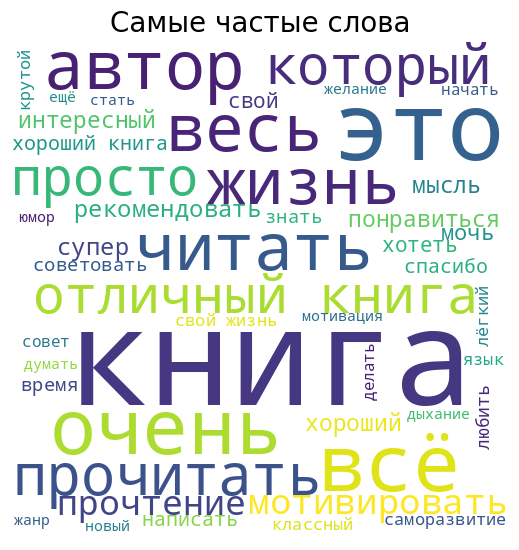

In [ ]:
create_WordCloud(data1['Коммент'], title="Самые частые слова")

In [ ]:
X_train,X_test = train_test_split(data['Коммент'],
                                  test_size=0.2,
                                  random_state=1)

In [ ]:
def transforming(data:pd.Series) ->list:
  transform = [final_result(data=i) for i in data]
  transform = [i for i in transform if i not in [None,'']]
  return transform

In [ ]:
x_train=transforming(X_train)
x_test=transforming(X_test)

In [ ]:
x_train[:3]

['хороший книга саморазвитие прочитать',
 'книга очень мотивировать',
 'спойлеровва целое книга плохой слишком говориться деньга порой действительно заставлять встать диван начать действовать понравиться читать +100500 млн секунда важно заставить начать себя заниматься каждый делать свой выбор мена понравиться']

**CountVectorizer**

---



In [ ]:
vector = CountVectorizer(
    analyzer='word',
    min_df=3,
    ngram_range=(2,3),
    stop_words = stopwords.words('russian'))
train = vector.fit_transform(x_train)

In [ ]:
vector.get_feature_names_out()

array(['весь книга', 'заставлять встать', 'изменить жизнь',
       'каждый глава', 'классный книга', 'книга который',
       'книга мотивировать', 'книга написать', 'книга очень',
       'книга просто', 'книга рекомендовать', 'книга саморазвитие',
       'книга спасибо', 'книга супер', 'книга читаться',
       'книга читаться дыхание', 'крутой книга', 'легко читаться',
       'мотивационный книга', 'отличный книга', 'очень интересный',
       'очень мотивировать', 'очень понравиться', 'понравиться книга',
       'рекомендовать весь', 'свой жизнь', 'советовать прочитать',
       'спасибо автор', 'хороший книга', 'читать книга',
       'читаться дыхание', 'шикарный книга', 'это первый'], dtype=object)

In [ ]:
vector

CountVectorizer(min_df=3, ngram_range=(2, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [ ]:
test = vector.transform(x_test)

# LDA

In [ ]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97721 sha256=803a3389b87cadd1c613adae61161afd2c84065b17a5cc264c8f85142402d8bb
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

In [ ]:
dictionary = corpora.Dictionary(data1['Коммент'])
print('Размер словаря до фильтрации: {}'.format(len(dictionary)))
dictionary.filter_extremes(no_below=3, no_above=0.7, keep_n=None)
dictionary.save('comm.dict')
print('Размер словаря после фильтрации: {}'.format(len(dictionary)))
print(dictionary)

Размер словаря до фильтрации: 1065
Размер словаря после фильтрации: 167
Dictionary<167 unique tokens: ['автор', 'больший', 'большинство', 'большой', 'бояться']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = [dictionary.doc2bow(i) for i in data1['Коммент']]
corpora.MmCorpus.serialize('comm.model', corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda.show_topics(num_topics=5, num_words=10, formatted=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.175*"книга" + 0.052*"понравиться" + 0.050*"очень" + 0.047*"всё" + 0.034*"отличный" + 0.033*"интересный" + 0.028*"хороший" + 0.028*"рекомендовать" + 0.026*"хотеть" + 0.026*"автор"'),
 (1,
  '0.134*"круто" + 0.133*"крутой" + 0.019*"любить" + 0.004*"путь" + 0.004*"полезный" + 0.004*"получить" + 0.004*"открыть" + 0.004*"идти" + 0.004*"столько" + 0.004*"прочтение"'),
 (2,
  '0.055*"это" + 0.054*"книга" + 0.036*"читать" + 0.032*"жизнь" + 0.032*"свой" + 0.028*"мысль" + 0.024*"который" + 0.023*"всё" + 0.021*"язык" + 0.018*"вода"'),
 (3,
  '0.155*"книга" + 0.110*"супер" + 0.098*"хороший" + 0.060*"очень" + 0.054*"мотивация" + 0.049*"мотивировать" + 0.041*"просто" + 0.033*"советовать" + 0.025*"ещё" + 0.024*"отлично"'),
 (4,
  '0.088*"огонь" + 0.061*"поучительный" + 0.005*"весь" + 0.005*"советовать" + 0.005*"книга" + 0.005*"мотивировать" + 0.005*"это" + 0.005*"вода" + 0.005*"цитата" + 0.005*"круто"')]

In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


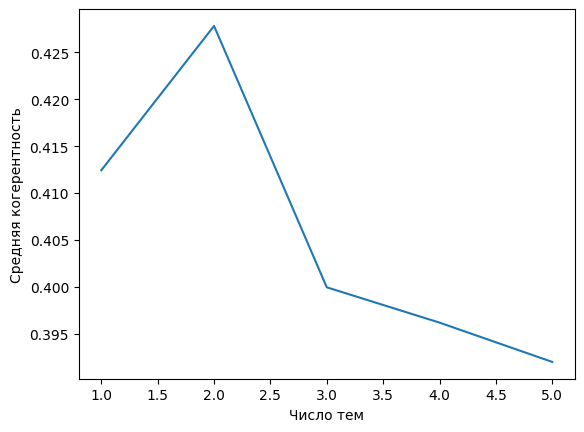

In [ ]:
topics_list = [1,2,3,4,5]
coherences = []

for i in topics_list:
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=i, chunksize=50, update_every=1, passes=5,random_state=1)
    coherences.append(CoherenceModel(model=lda, texts=data1['Коммент'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [ ]:
lda1 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2, chunksize=50, update_every=1, passes=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda1.show_topics(num_topics=2, num_words=10, formatted=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.120*"книга" + 0.050*"очень" + 0.047*"хороший" + 0.036*"читать" + 0.035*"понравиться" + 0.031*"всё" + 0.029*"мотивировать" + 0.021*"автор" + 0.020*"интересный" + 0.017*"рекомендовать"'),
 (1,
  '0.093*"книга" + 0.050*"это" + 0.032*"супер" + 0.029*"жизнь" + 0.025*"просто" + 0.025*"отличный" + 0.024*"свой" + 0.023*"всё" + 0.022*"который" + 0.019*"хотеть"')]

In [ ]:
vis_data1 = gensimvis.prepare(lda1, corpus, dictionary)
pyLDAvis.display(vis_data1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


In [ ]:
print('Perplexity: ', lda1.log_perplexity(corpus))

Perplexity:  -4.865468695245934


In [ ]:
print('Персплексия: ', np.exp(lda1.log_perplexity(corpus)))

Персплексия:  0.00770821461213484


In [ ]:
lda_model = LatentDirichletAllocation(
    n_components=2,
    learning_method='online',
    random_state=1,
    n_jobs=-1,
)
lda_model.fit(train)

LatentDirichletAllocation(learning_method='online', n_components=2, n_jobs=-1,
                          random_state=1)

In [ ]:
def predict_topic(data, vectorizer=vector, model=lda_model):
  transf=final_result(data)
  vec_text = vector.transform([transf])
  topic_proba = model.transform(vec_text)[0]
  return np.argmax(topic_proba)

In [ ]:
data['Top_topic']=data['Коммент'].transform(predict_topic)
data['Top_topic']=data['Top_topic'].map({0:1,1:2})

In [ ]:
data.head(10)

,Имя,Коммент,Дата,Рейтинг,Ссылка,Top_topic
0,Anastasia_Markova,"Произведение состоит из нескольких глав, в каж...",2019-10-28T21:20:00.000000,4,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,2
1,Arinushk,"Введение Бестселлер, популярнейшая книга, силь...",2022-11-02T17:14:00.000000,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,1
2,Vemnos,"Книга на твердую четверку.Она помогает, она ле...",2019-08-09T18:48:00.000000,4,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,1
3,vampi,"Это книга, как и все книги по поиску себя, гов...",2020-05-04T16:03:00.000000,3,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,2
4,Iren-hell,"В общем я не знаю, кого она и на что замотивир...",2021-11-03T13:28:00.000000,2,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,1
5,Svetlana Sokolova,"Прекрасная вдохновляющая книга, написанная с ю...",2018-05-13T15:12:17.292127,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,2
6,nitsa....@mail.ru,"Ждала большего от этой книге, по моему много в...",2018-03-24T14:21:30.578020,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,1
7,Алина,"Это ЛУЧШАЯ КНИГА, из всех мотивационных книг, ...",2018-06-25T16:08:41.835889,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,2
8,+ -,Оказывается нужно просто поверить в Бога,2022-07-06T16:48:02.872073,1,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,1
9,Anya 🦋,Замечательная книга! Долгое время не могла взя...,2018-07-31T23:01:18.262162,5,https://mybook.ru/author/dzhen-sinsero-2/ni-sy...,2


In [ ]:
predict_topic('Типичная книга о мотивации, много воды')

0

In [ ]:
def show_topics(vectorizer, model, n_words=10):
  feature_names = np.array(vector.get_feature_names_out())
  top_words=[]

  for i in model.components_:
    top_keys_weight = (-i).argsort()[:n_words]
    top_words.append(feature_names.take(top_keys_weight))
    return top_words

In [ ]:
topic_keys = show_topics(vectorizer=vector,
                         model = lda_model,
                         n_words=10)
df_top = pd.DataFrame(topic_keys)
df_top.columns=['Слово ' + str(i) for i in range(df_top.shape[1])]
df_top.index = ['Тема ' + str(i) for i in range(df_top.shape[0])]
df_top

,Слово 0,Слово 1,Слово 2,Слово 3,Слово 4,Слово 5,Слово 6,Слово 7,Слово 8,Слово 9
Тема 0,хороший книга,книга очень,книга саморазвитие,отличный книга,изменить жизнь,весь книга,легко читаться,книга мотивировать,классный книга,рекомендовать весь


In [ ]:
data.groupby(data['Top_topic'])['Рейтинг'].mean()

Top_topic
1    4.546448
2    4.596154
Name: Рейтинг, dtype: float64

# LSA

In [ ]:
from gensim.models import LsiModel

In [ ]:
lsi = lsimodel.LsiModel(corpus, id2word=dictionary, num_topics=2, chunksize=50)
lsi.show_topics(num_topics=2, num_words=10, formatted=False)

[(0,
  [('это', 0.62914947366356),
   ('книга', 0.5334732202096003),
   ('жизнь', 0.23603445441964274),
   ('весь', 0.1925114605485078),
   ('всё', 0.13849241050998187),
   ('мочь', 0.13616373169248666),
   ('саморазвитие', 0.10820174795404439),
   ('жанр', 0.10671208701101988),
   ('свой', 0.10495740932393095),
   ('очень', 0.1001518490064423)]),
 (1,
  [('это', -0.37206946442787847),
   ('книга', 0.3384139722331989),
   ('свой', 0.2862700721945937),
   ('автор', 0.23226397190401304),
   ('всё', 0.1975319135485001),
   ('знать', 0.18253263111499746),
   ('глава', 0.18055424920232552),
   ('жанр', -0.17272009484761972),
   ('должный', 0.16815837839669598),
   ('саморазвитие', -0.1587174904002542)])]

In [ ]:
!pip install bertopic[visualization] --quiet

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bertopic import BERTopic

In [ ]:
data1.head()

,Имя,Коммент,Рейтинг
0,Anastasia_Markova,произведение состоять несколько глава каждый р...,4
1,Arinushk,введение бестселлер популярный книга сильный м...,5
2,Vemnos,книга твёрдый четвёрка помогать лечить эмоцион...,4
3,vampi,это книга всё книга поиск говорить должный боя...,3
4,Iren-hell,общий знать замотивировать лично кроме смешанн...,2


In [ ]:
model = BERTopic(language='russian')

In [ ]:
docs = list(data1.loc[:,'Коммент'].values)

In [ ]:
topics, probs = model.fit_transform(docs)

In [ ]:
model.get_topic_freq()

,Topic,Count
0,0,171
1,1,64


In [ ]:
model.get_topic(0)

[('книга', 0.15128216461929228),
 ('это', 0.07318967202389447),
 ('очень', 0.056997033969241225),
 ('жизнь', 0.05089997730933775),
 ('всё', 0.04488137638668523),
 ('свой', 0.0442961709666944),
 ('автор', 0.04315199220979002),
 ('хороший', 0.042768716795429075),
 ('читать', 0.04199416548411143),
 ('весь', 0.03925208067033787)]

In [ ]:
model.get_topic(1)

[('супер', 0.35015325189717794),
 ('понравиться', 0.2899780788749685),
 ('всё', 0.2513557440941813),
 ('круто', 0.24875687643650735),
 ('спасибо', 0.16509670738047924),
 ('огонь', 0.16289618532950054),
 ('вода', 0.14439087435688946),
 ('отлично', 0.10347387210579759),
 ('очень', 0.09120252438062897),
 ('крутой', 0.08719289147475662)]